In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("df_final.csv", index_col = 0)
df.sample(3)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
720,721,42,No,non_travel,556.26,NaN,3,3,NaN,3,female,103.091137,4,2,laboratory technician,4,married,4492.84000,11681.39,2,yes,13,3.0,2,part time,1,17.0,1,2.0,5,NaN,1,3,1981,79935.796105,yes
304,305,31,No,travel_rarely,556.26,NaN,7,3,technical degree,2,male,69.530699,4,2,sales executive,4,NaN,4492.84000,11681.39,4,no,11,3.0,2,part time,1,10.0,3,2.0,8,NaN,7,7,1992,53914.110000,yes
663,664,43,No,travel_rarely,290.04,NaN,2,2,medical,4,female,36.250000,4,1,research scientist,3,NaN,2575.61993,6090.75,1,no,12,3.0,4,part time,2,6.0,3,2.0,5,NaN,1,4,1980,28111.130000,no


In [4]:
df_correlaciones = df.corr(method="spearman", min_periods=1, numeric_only=True)
df_correlaciones

,employee_id,age,$_dailyrate,distancefromhome,education,environmentsatisfaction,$_hourlyrate,jobinvolvement,joblevel,jobsatisfaction,$_monthlyincome,$_monthlyrate,numcompaniesworked,%_percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary
employee_id,1.000000,-0.165317,-0.320877,-0.010104,-0.019271,-0.015555,-0.323932,0.007590,-0.308251,0.008733,-0.304697,-0.320877,0.084187,-0.002266,-0.020604,-0.003240,-0.052760,-0.357211,0.008148,-0.011436,-0.651688,-0.711348,-0.374922,-0.550639,0.164749,-0.317711
age,-0.165317,1.000000,0.473370,-0.018802,0.199142,0.018352,0.485222,0.041730,0.486043,-0.010174,0.463460,0.473370,0.338368,0.013307,0.011450,0.045807,0.057739,0.580276,-0.011728,0.003474,0.254005,0.499583,0.171217,0.190263,-0.999812,0.478571
$_dailyrate,-0.320877,0.473370,1.000000,0.002264,0.106859,-0.005676,0.931831,-0.003851,0.944917,-0.004535,0.974188,1.000000,0.168364,-0.042501,-0.046086,0.003676,0.047524,0.734351,-0.039136,0.038855,0.468319,0.545052,0.257213,0.362837,-0.473189,0.935547
distancefromhome,-0.010104,-0.018802,0.002264,1.000000,0.005726,0.127957,-0.011601,0.028308,0.016072,0.007592,0.008400,0.002264,0.022006,0.048240,0.046284,0.005338,0.043674,-0.022624,-0.052078,-0.026897,-0.015424,0.353774,-0.024378,-0.014242,0.018656,-0.009811
education,-0.019271,0.199142,0.106859,0.005726,1.000000,-0.034295,0.108145,0.036402,0.103286,-0.001681,0.091428,0.106859,0.122867,0.008786,-0.050547,-0.019888,0.008219,0.131154,-0.035741,0.019819,0.064417,0.054850,0.041675,0.050812,-0.199620,0.104509
environmentsatisfaction,-0.015555,0.018352,-0.005676,0.127957,-0.034295,1.000000,-0.019282,-0.016772,0.009698,0.007864,0.006504,-0.005676,-0.001928,-0.028838,0.004848,0.008681,0.020840,-0.013015,-0.051109,0.039853,0.004498,0.256841,0.028283,0.000922,-0.018354,-0.018986
$_hourlyrate,-0.323932,0.485222,0.931831,-0.011601,0.108145,-0.019282,1.000000,-0.007103,0.891935,0.002220,0.908573,0.931831,0.173220,-0.053679,-0.041780,0.008811,0.050709,0.805414,-0.033003,0.040971,0.461873,0.580790,0.252082,0.357146,-0.484983,0.996036
jobinvolvement,0.007590,0.041730,-0.003851,0.028308,0.036402,-0.016772,-0.007103,1.000000,-0.003778,-0.010614,-0.014531,-0.003851,0.024892,-0.005998,-0.047326,0.038432,0.048506,0.017059,0.006675,-0.024048,0.021764,-0.479406,-0.006973,0.050327,-0.041914,-0.007109
joblevel,-0.308251,0.486043,0.944917,0.016072,0.103286,0.009698,0.891935,-0.003778,1.000000,-0.012870,0.929695,0.944917,0.174150,-0.037048,-0.033437,0.008850,0.050809,0.749102,-0.025442,0.042596,0.476567,0.517411,0.255848,0.366739,-0.486174,0.895461
jobsatisfaction,0.008733,-0.010174,-0.004535,0.007592,-0.001681,0.007864,0.002220,-0.010614,-0.012870,1.000000,-0.002541,-0.004535,-0.053438,0.032164,0.001998,-0.009525,0.016304,-0.004563,-0.001101,-0.035131,0.010673,-0.349561,0.009088,-0.017182,0.010555,0.004229


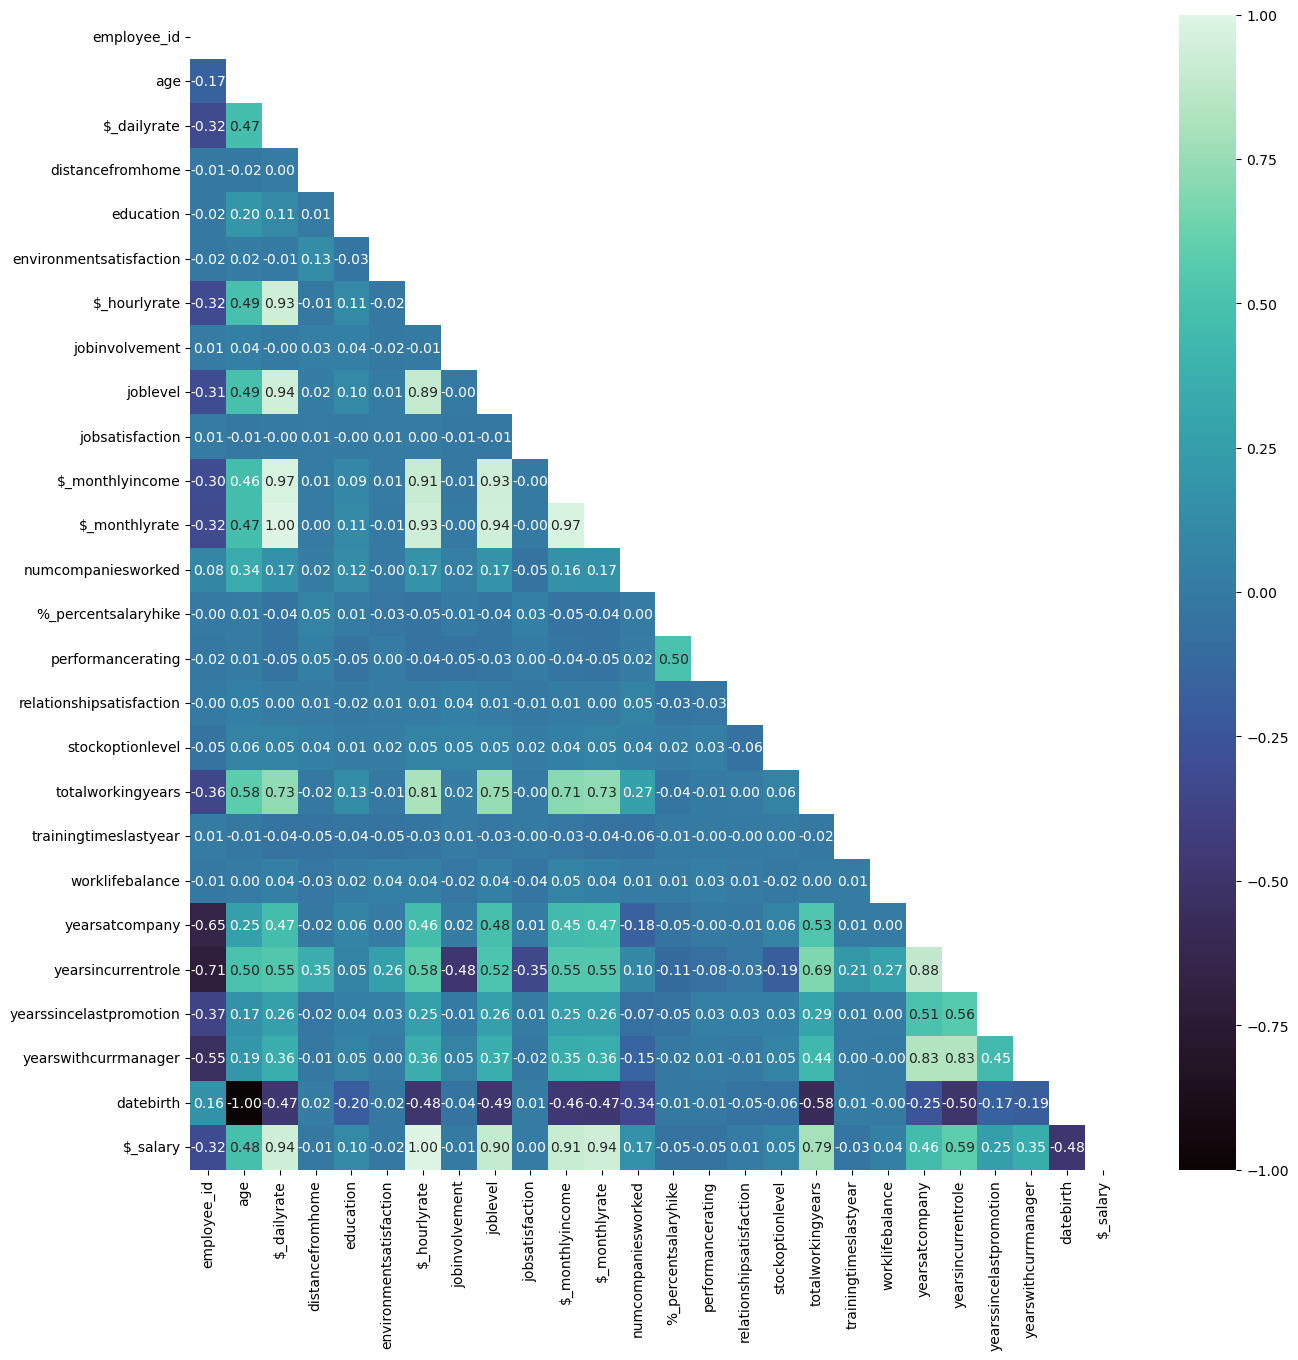

In [5]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

**Interpretación de los resultados**

La fuerza de una correlación se evalúa en función del valor absoluto del coeficiente de correlación. Algunos criterios para decidir si la relación es fuerte, moderada o débil son: 

1. **Correlación Débil**:

   - Cercano a -1: Correlación negativa fuerte (cuando una variable sube, la otra baja).

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - Cercano a 0: No hay relación clara entre las variables

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - Cercano a 1: Correlación positiva fuerte (cuando una variable sube, la otra también sube).

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

**Conclusiones**:

Las variables relacionadas con el salario (ingreso mensual, tarifa mensual, salario) muestran correlaciones positivas muy fuertes entre sí y con el nivel de trabajo.
Los años totales de trabajo están fuertemente correlacionados con el nivel de trabajo y moderadamente correlacionados con la edad.
Los años en el rol actual y los años con el gerente actual están fuertemente correlacionados entre sí y con los años en la empresa.
La mayoría de las otras variables muestran correlaciones débiles o nulas entre sí.